# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
+ data source: http://jsonstudio.com/resources/
****

In [3]:
import pandas as pd

## imports for Python, Pandas

In [4]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [4]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [7]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [8]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,info.governor,state,shortname
0,Dade,12345,Rick Scott,Florida,FL
1,Broward,40000,Rick Scott,Florida,FL
2,Palm Beach,60000,Rick Scott,Florida,FL
3,Summit,1234,John Kasich,Ohio,OH
4,Cuyahoga,1337,John Kasich,Ohio,OH


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 
+ data source: http://jsonstudio.com/resources/

In [9]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{u'_id': {u'$oid': u'52b213b38594d8a2be17c780'},
  u'approvalfy': 1999,
  u'board_approval_month': u'November',
  u'boardapprovaldate': u'2013-11-12T00:00:00Z',
  u'borrower': u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  u'closingdate': u'2018-07-07T00:00:00Z',
  u'country_namecode': u'Federal Democratic Republic of Ethiopia!$!ET',
  u'countrycode': u'ET',
  u'countryname': u'Federal Democratic Republic of Ethiopia',
  u'countryshortname': u'Ethiopia',
  u'docty': u'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  u'envassesmentcategorycode': u'C',
  u'grantamt': 0,
  u'ibrdcommamt': 0,
  u'id': u'P129828',
  u'idacommamt': 130000000,
  u'impagency': u'MINISTRY OF EDUCATION',
  u'lendinginstr': u'Investment Project Financing',
  u'lendinginstrtype': u'IN',
  u'lendprojectcost': 550000000,
  u'majorsector_percent': [{u'Name': u'Education', u'Percent': 46},
   {u'Name': u'Education', u'Percent': 26},
   {u'Name': u'Public Administration, Law, and Ju

In [10]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{u'$oid': u'52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{u'Percent': 100, u'Name': u'Education for all'}","[{u'code': u'65', u'name': u'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{u'$oid': u'52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{u'Percent': 30, u'Name': u'Other economic man...","[{u'code': u'24', u'name': u'Other economic ma...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

#Task 1 Find the 10 countries with most projects

In [178]:
#Load the json 
sample_json_df=pd.read_json('data/world_bank_projects.json')

#Analyze
print(sample_json_df.shape)
print(sample_json_df.info())


(500, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
sector                      500 non-null object
supplementprojectflg        498 non-null object
projectfinancialtype        500 non-null object
prodline                    500 non-null object
mjtheme                     491 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
project_name                500 non-null object
mjthemecode                 500 non-null object
closingdate                 370 non-null object
totalcommamt                500 non-null int64
id                          500 non-null object
mjsector_namecode           500 non-null object
docty                       446 non-null object
sector1                     500 non-null object
lendinginstr                495 non-null object
countrycode                 500 non-null object
sector2                     380 non-null object
totalamt               

In [76]:
#Group by country and get the count of projects
groupedCtrySeries=sample_json_df.groupby('countryname')['project_name'].count()

#sort and get back the dataframe of top 10 countries with most projects
top10Ctrywithprojects=groupedCtrySeries.sort_values(ascending=False)[:10].reset_index()

#Change the cols to meaningful names
top10Ctrywithprojects.columns=['CountryName','ProjectCounts']

#Reset the index and print
top10Ctrywithprojectsrenamed=top10Ctrywithprojects.set_index('CountryName')
top10Ctrywithprojectsrenamed

,ProjectCounts
CountryName,
People's Republic of China,19
Republic of Indonesia,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
Nepal,12
People's Republic of Bangladesh,12
Kingdom of Morocco,12
Africa,11


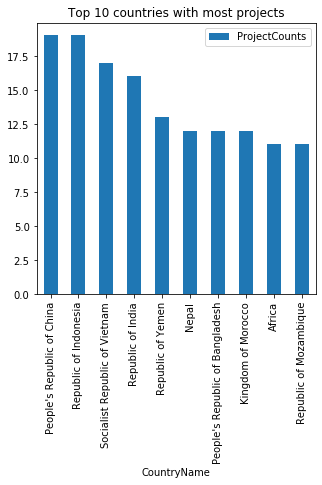

In [89]:
#Plot a Bar graph to visualize Top 10 countries with most projects
top10Ctrywithprojectsrenamed.plot(kind='bar',title='Top 10 countries with most projects',figsize=(5,5))

#Task 2 Find the top 10 major project themes (using column 'mjtheme_namecode')

In [163]:
#Use json_normalize and map to retrieve the required rows, map the data to get the json from each row and do value counts with sort
top10themes=json_normalize(sample_json_df['mjtheme_namecode'].map(lambda x:x[0]))['name'].value_counts().sort_values(ascending=False)[:10].reset_index()

#Change the cols to meaningful names
top10themes.columns=['Theme','Count']

#Reset the index and print
top10themes_indexed=top10themes.set_index('Theme')
top10themes_indexed



,Count
Theme,
Environment and natural resources management,85
Human development,72
Public sector governance,64
Social protection and risk management,57
Rural development,56
Financial and private sector development,53
Social dev/gender/inclusion,43
Trade and integration,25
Urban development,23


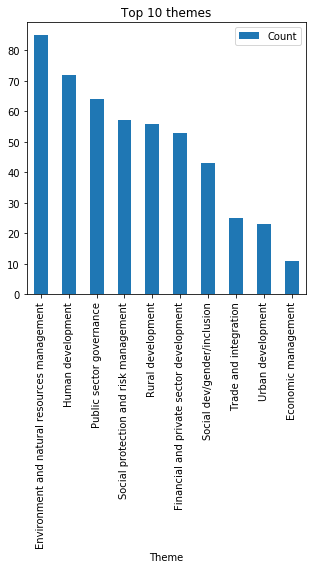

In [169]:
#Plot a Bar graph to visualize Top 10 themes
top10themes_indexed.plot(kind='bar',title='Top 10 themes',figsize=(5,5))

#Task 3 In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [168]:
#Use json_normalize and map to retrieve the required rows
top10themes=json_normalize(sample_json_df['mjtheme_namecode'].map(lambda x:x[0]))

#Fill the Empty names with 'Not Available' and reassign to name col
top10themes['name']=top10themes['name'].map(lambda x: 'Not Available' if x.strip()=='' else x)

#Check the value counts to see if the empty data is filled
top10themesfilled=top10themes['name'].value_counts().reset_index()

#chnage the column names to proper names
top10themesfilled.columns=['Theme','Count']

#print the head
top10themesfilled[top10themesfilled['Theme']=='Not Available'].head()

,Theme,Count
10,Not Available,9
